## PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Implementa las transformaciones que elegiste. Es importante que justifiques por qué las haces:

* Detección y eliminación de Outliers
* Encoding
* Imputación de valores faltantes
* Escalado de datos
* Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

## PARTE B - Modelos Avanzados

1. Elige dos de los modelos avanzados vistos Compara con el desempeño obtenido en el proyecto 01 (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
2. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
3. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

## PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

* ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
* ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

## DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas import plotting
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree as Arbol
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor



from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans



#Librerias a instalar
import sys
import gc


In [3]:
dp= pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
dp = pd.DataFrame(dp)
dp.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
dp.shape


(146660, 19)

In [5]:
print(list(dp.columns))

['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency', 'title', 'description', 'property_type', 'operation_type']


### Tipos de propiedades 

In [6]:
print(data['property_type'].unique()) 
print(data['property_type'].value_counts())
fig, ax= plt.subplots(figsize= (9,7))
gr=sns.countplot(data = data, y = "property_type", ax=ax)
gr.set(xscale='log')

NameError: name 'data' is not defined

En este grafico veremos las regiones donde se encuentran las propiedades

C:\Users\LENOVO\anaconda3\envs\datascience\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


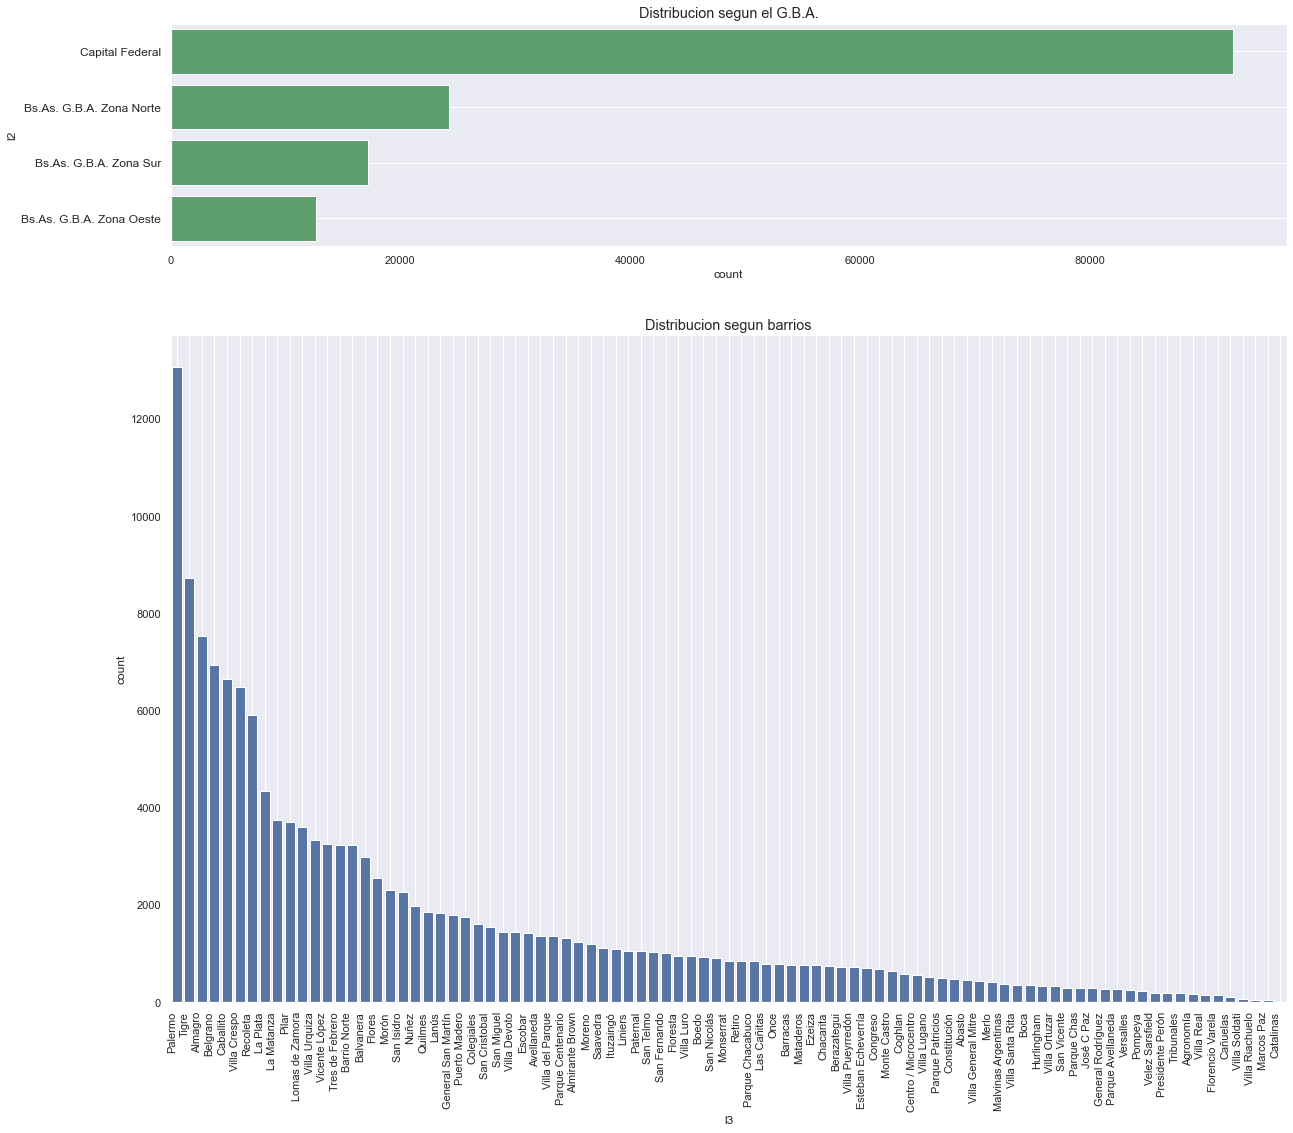

In [7]:
fig= plt.subplots(figsize=(20,18),constrained_layout=True)
grid = gridspec.GridSpec(2, 1, height_ratios=[1, 3])

ax1=plt.subplot(grid[0])
sns.countplot(data=dp,y="l2",order=dp["l2"].value_counts().index,ax=ax1,color="g")

ax1.set_yticklabels(ax1.get_yticklabels(),fontsize="medium")
ax1.set_title("Distribucion segun el G.B.A.", fontsize= 'large')

ax2=plt.subplot(grid[1])
sns.countplot(data=dp,x="l3",order=dp["l3"].value_counts().index,ax=ax2,color="b")


ax2.set_title("Distribucion segun barrios", fontsize= 'large')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90,ha="right")
plt.yticks(fontsize= 11)
ax1.grid()
ax2.grid()
plt.show()

In [8]:
dp.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [9]:
dp["property_type"].unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [10]:
dp["property_type"].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

In [11]:
dp = dp[((dp['property_type'] == "Departamento") |(dp['property_type'] == "Casa") | (dp['property_type'] == "PH"))  & (dp['l2'] == "Capital Federal")] 
dp.shape

(91485, 19)

Ajustamos la superficie ya que hay demasiados valores que van contra la logica, asi que pueden ser corregidos como los valores de superficie cubierta menores a la superficie total 

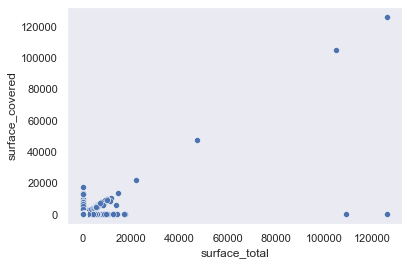

In [12]:
sns.scatterplot(data=dp, x='surface_total', y='surface_covered')
plt.grid()
plt.show()

In [13]:
dp.drop(dp.loc[dp['surface_covered'] > dp['surface_total']].index,inplace=True ,axis=0)

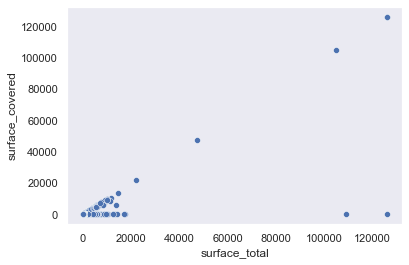

In [14]:
sns.scatterplot(data=dp, x='surface_total', y='surface_covered')
plt.grid()
plt.show()

In [15]:
dp.shape

(90725, 19)

### Identificacion de columnas con un solo valor 

In [17]:
for i in range(dp.shape[1]):
    print(i,len(pd.unique(dp.iloc[:,i])))

0 362
1 408
2 362
3 31132
4 31401
5 1
6 1
7 57
8 19
9 16
10 14
11 716
12 572
13 5179
14 1
15 42579
16 57932
17 3
18 1


Ya que los valores con valores unicos tienen cero varianza y pueden afectar al entrenamiento del algoritmo se decide eliminar las variables L1, L2, currency y Operation_type 

In [18]:
dp = dp.drop(["l1","l2","currency","operation_type"],axis=1)

In [19]:
dp.columns


Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l3', 'rooms',
       'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price',
       'title', 'description', 'property_type'],
      dtype='object')

### Identificacion de columnas con pocos valores 

In [20]:
for i in range(dp.shape[1]):
    num=len(pd.unique(dp.iloc[:,i]))
    porcentaje=float(num)/dp.shape[0]*100
    print("%d, %d, %.1f%%"%(i,num,porcentaje))

0, 362, 0.4%
1, 408, 0.4%
2, 362, 0.4%
3, 31132, 34.3%
4, 31401, 34.6%
5, 57, 0.1%
6, 19, 0.0%
7, 16, 0.0%
8, 14, 0.0%
9, 716, 0.8%
10, 572, 0.6%
11, 5179, 5.7%
12, 42579, 46.9%
13, 57932, 63.9%
14, 3, 0.0%


Debido a que solo se esta trabajando con 3 tipos de propiedad la columna property_type es muy pequeña 

### Identificacion de filas con datos duplicados 

In [21]:
duplicado = dp.duplicated()
print(duplicado.any())
print(dp[duplicado])

True
        start_date    end_date  created_on        lat        lon  \
7       2019-10-17  2019-10-31  2019-10-17 -34.600988 -58.433061   
9       2019-10-17  2019-12-23  2019-10-17 -34.639598 -58.419612   
40      2019-10-17  2019-10-22  2019-10-17 -34.597613 -58.416688   
48      2019-10-17  2019-10-27  2019-10-17 -34.597613 -58.416688   
51      2019-10-17  2019-11-15  2019-10-17 -34.577746 -58.431085   
...            ...         ...         ...        ...        ...   
146162  2019-07-31  2019-08-14  2019-07-31 -34.578066 -58.426532   
146171  2019-07-31  2019-08-14  2019-07-31 -34.578066 -58.426532   
146173  2019-07-31  2019-09-04  2019-07-31 -34.575165 -58.431149   
146497  2019-07-31  2019-09-04  2019-07-31        NaN        NaN   
146546  2019-07-31  2020-01-17  2019-07-31        NaN        NaN   

                      l3  rooms  bedrooms  bathrooms  surface_total  \
7           Villa Crespo    2.0       1.0        1.0           70.0   
9       Parque Patricios    1.0     

Se conciderará valores duplicados a los que tengan todos los valores iguales en todas las columnas 

### Eliminacion de Filas Duplicadas

In [22]:
print(dp.shape)
dp.drop_duplicates(inplace=True)
print(dp.shape)

(90725, 15)
(89114, 15)


In [23]:
dp = dp.drop(["start_date","end_date","title","description"],axis=1)

<AxesSubplot:>

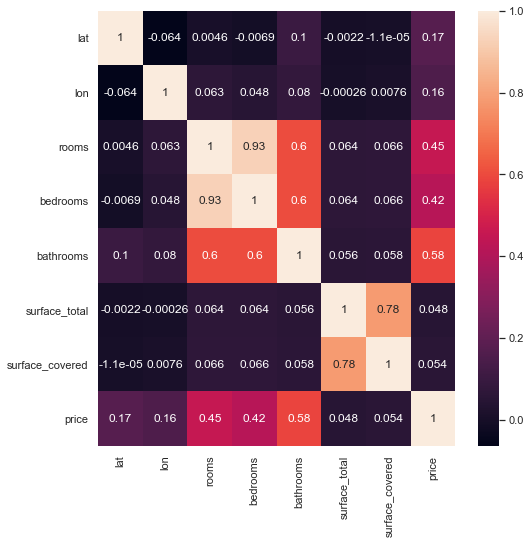

In [24]:
fig =plt.subplots(figsize=(8,8))
sns.heatmap(dp.corr(), annot=True)

## Imputacion de valores faltantes 

In [25]:
dp1 = dp.copy()

In [26]:
dp1.isnull().sum()

created_on            0
lat                4376
lon                4390
l3                    0
rooms                 0
bedrooms              0
bathrooms          2139
surface_total      8717
surface_covered    9024
price                 0
property_type         0
dtype: int64

### Imputacion Estadistica

In [ ]:
X= dp[["rooms", "bedroom"]]